
(process:11936): GLib-GIO-WARNING **: 18:42:29.499: Unexpectedly, UWP app `Evernote.Evernote_10.22.3.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs

(process:11936): GLib-GIO-WARNING **: 18:42:29.571: Unexpectedly, UWP app `15191PeakPlayer.50533F9B98293_3.2.6.0_x64__y5c4dfz5b21fm' (AUMId `15191PeakPlayer.50533F9B98293_y5c4dfz5b21fm!App') supports 32 extensions but has no verbs


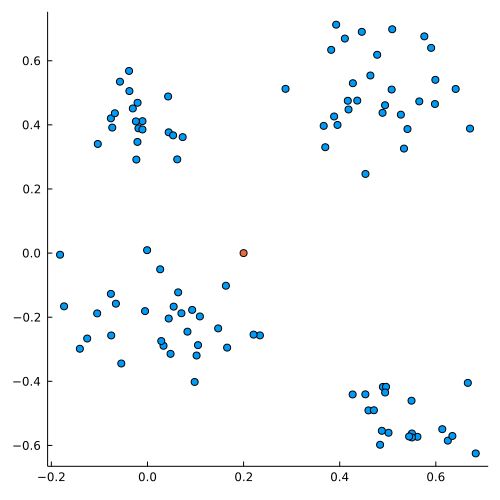

In [1]:
# 1

using LinearAlgebra
using Statistics
import Random
using Plots
using VMLS

Random.seed!(8)
X = vcat( [ [0, -0.2] + 0.1*randn(2) for i = 1:30 ],
 [ [0.5, 0.5] + 0.1*randn(2) for i = 1:30 ],
 [ [0.5, -0.5] + 0.1*randn(2) for i = 1:20 ],
 [ [0, 0.4] + 0.06* randn(2) for i = 1:20])

Che_res = [0.2, 0]


scatter([x[1] for x in X], [x[2] for x in X])
scatter!([Che_res[1]], [Che_res[2]])
plot!(legend = false, grid = false, size = (500,500))

In [2]:
# 2 a,b

distances_1 = zeros(length(X))
for i in 1:length(X)
    distances_1[i] = norm(X[i] - Che_res)
end
println("These are all distances (in terms of 2-norm) between Chelsea's restaurant and all her customers：\n\n", distances_1)

println("\nCustomer ", findmin(distances_1)[2], " is the closest customer to Chelsea's restaurant in terms of 2-norm.")

These are all distances (in terms of 2-norm) between Chelsea's restaurant and all her customers：

[0.2009677473503477, 0.25896260382301883, 0.42061324214195295, 0.25681145113350495, 0.18311296675364602, 0.3337325170375205, 0.30235710582270836, 0.34911442689820105, 0.42816530554960197, 0.22796247114875975, 0.2735099500161391, 0.4087802805445024, 0.3040375580970352, 0.33414103904197495, 0.18072514224273636, 0.25515907137194827, 0.2968302097625538, 0.45286928460732195, 0.3234524421184, 0.38190313311155316, 0.35804600583071267, 0.2214777808533561, 0.27150922885850415, 0.37665689382076706, 0.41468352729322994, 0.24075740733699408, 0.30905153011315495, 0.21752699574550757, 0.20704714569444144, 0.10825853896279175, 0.444915768740275, 0.6106488410454415, 0.5312820897959437, 0.6122261689301772, 0.5979904266677406, 0.5766584137636611, 0.35393194713041715, 0.6718186266177286, 0.46656702131250816, 0.5196961812413883, 0.6136070015320558, 0.6759016621073926, 0.49828951069410593, 0.7497210949018761, 

In [3]:
# 2 c

distances_2 = zeros(length(X))
for i in 1:length(X)
    distances_2[i] = abs(X[i][1] - Che_res[1]) + abs(X[i][2] - Che_res[2])
end
# println(distances_2)
println("Customer ", findmax(distances_2)[2], " is the farthest customer to Chelsea's restaurant in terms of 1-norm.")

Customer 65 is the farthest customer to Chelsea's restaurant in terms of 1-norm.


In [4]:
# 2 d 2-norm

distances_1 = zeros(length(X))
for i in 1:length(X)
    distances_1[i] = norm(X[i] - Che_res)
end

copy_distances_1 = copy(distances_1)

small_index_1 = []

for i in 1:5
    fake_index = findmin(copy_distances_1)[2]
    real_index = findall(x -> x==copy_distances_1[fake_index], distances_1)
    append!(small_index_1, real_index)
    deleteat!(copy_distances_1, findmin(copy_distances_1)[2])
end

println(small_index_1)

Any[30, 15, 5, 1, 29]


In [5]:
# 2 d 1-norm

distances_2 = zeros(length(X))
for i in 1:length(X)
    distances_2[i] = abs(X[i][1] - Che_res[1]) + abs(X[i][2] - Che_res[2])
end

copy_distances_2 = copy(distances_2)

small_index_2 = []

for i in 1:5
    fake_index = findmin(copy_distances_2)[2]
    real_index = findall(x -> x==copy_distances_2[fake_index], distances_2)    
    append!(small_index_2, real_index)
    deleteat!(copy_distances_2, findmin(copy_distances_2)[2])
end

println(small_index_2)

Any[30, 1, 15, 5, 16]


### Answer 2d. : The 5 closest customers to Chelsea's restaurant calculated using 1-norm and 2-norm are "not" the same.

Data point 97 is the farthest (in terms of 2-norm) to its prediction.


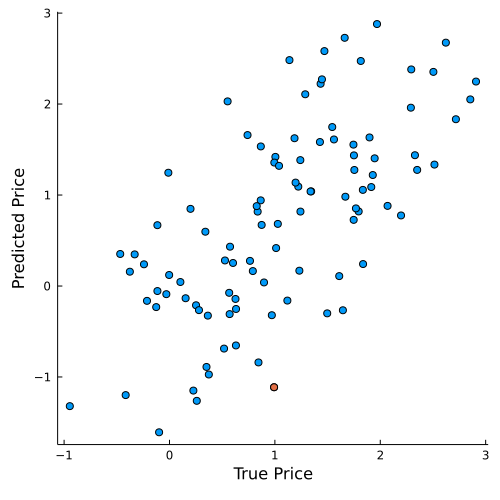

In [6]:
# 3

Random.seed!(8)
y = randn(100)
Random.seed!(8)
quality = y * 0.5 + rand(100) * 0.1
Random.seed!(10)
nutrition = y * 0.1 + rand(100) * 0.2
price = quality * 1 + nutrition * 0.1 + rand(100) * 2

predicted_price = 0.5*quality + 7.1*nutrition .+ 0.1

println("Data point ", findmax([norm(price[i] - predicted_price[i]) for i = 1:length(price)])[2], " is the farthest (in terms of 2-norm) to its prediction.")

scatter(price, predicted_price)
scatter!([price[97]], [predicted_price[97]])
plot!(legend = false, grid = false, size = (500,500), xaxis = "True Price", yaxis = "Predicted Price")

In [7]:
# 4 k-means algorithm
function kmeansfunction(x, k; maxiters = 100, tol = 1e-5)
N = length(x)     # number of points to be cluster
n = length(x[1])  # the dimension
distances = zeros(N)  # used to store the distance of each point to the nearest representative.
reps = [zeros(n) for i=1:k]  # used to store representatives.
    
# 'assignment' is an array of N integers between 1 and k.
# The initial assignment is chosen randomly.
assignment = [rand(1:k) for i=1:N] 
Jprevious = Inf  # used in stopping condition
    
for iter = 1:maxiters
    # Cluster j representative is average of points in cluster j.
    for j = 1:k
        group = [i for i=1:N if assignment[i]==j]  # get which point index belongs to the group j 
        reps[j] = sum(x[group]) / length(group);     # reps is the clustering center
    end;
    # For each x[i], find distance to the nearest representative
    # and its group index.
    for i = 1:N
        (distances[i], assignment[i]) = findmin([norm(x[i] - reps[j]) for j=1:k])
    end;

    # Compute clustering objective.
    J = norm(distances)^2 / N  # distance to the clustering center

    # Show progress and terminate if J stopped decreasing.
    println("Iteration ", iter, ": Jclust = ", J, ".")
    if (iter > 1) && (abs(J - Jprevious) < tol*J)
         return assignment, reps
    end
 Jprevious = J
 end

 end

kmeansfunction (generic function with 1 method)

In [8]:
# 4 a,b
assignment, reps = kmeansfunction(X, 3)
println("\n\n", reps, " are the best locations to open these three restaurants for Chelsea's franchisee.")

Iteration 1: Jclust = 0.21805080743372227.
Iteration 2: Jclust = 0.054753907704250544.
Iteration 3: Jclust = 0.04740440133730133.
Iteration 4: Jclust = 0.04707074206229065.
Iteration 5: Jclust = 0.04707074206229065.


[[0.5371909960116741, -0.5161171797997566], [0.02958765596728597, -0.21210401348889638], [0.2808290177102955, 0.46611675910208605]] are the best locations to open these three restaurants for Chelsea's franchisee.


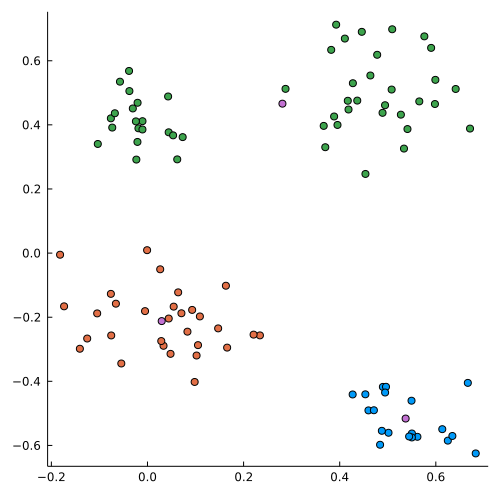

In [9]:
k = 3   # Number of groups 
N = length(X)  # Total number of points to be clustered
grps  = [[X[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
scatter!([c[1] for c in reps], [c[2] for c in reps])
plot!(legend = false, grid = false, size = (500,500))

In [10]:
# 4 c
# 4 k-means algorithm with 1-norm
function kmeansfunction_2(x, k; maxiters = 100, tol = 1e-5)
N = length(x)     # number of points to be cluster
n = length(x[1])  # the dimension
distances = zeros(N)  # used to store the distance of each point to the nearest representative.
reps = [zeros(n) for i=1:k]  # used to store representatives.
    
# 'assignment' is an array of N integers between 1 and k.
# The initial assignment is chosen randomly.
assignment = [rand(1:k) for i=1:N] 
Jprevious = Inf  # used in stopping condition
    
for iter = 1:maxiters
    # Cluster j representative is average of points in cluster j.
    for j = 1:k
        group = [i for i=1:N if assignment[i]==j]  # get which point index belongs to the group j 
        reps[j] = sum(x[group]) / length(group);     # reps is the clustering center
    end;
    # For each x[i], find distance to the nearest representative
    # and its group index.
    for i = 1:N
        (distances[i], assignment[i]) = findmin([(abs(x[i][1] - reps[j][1]) + abs(x[i][2] - reps[j][2])) for j=1:k])
    end;

    # Compute clustering objective.
    J = norm(distances)^2 / N  # distance to the clustering center

    # Show progress and terminate if J stopped decreasing.
    println("Iteration ", iter, ": Jclust = ", J, ".")
    if (iter > 1) && (abs(J - Jprevious) < tol*J)
         return assignment, reps
    end
 Jprevious = J
 end

 end

kmeansfunction_2 (generic function with 1 method)

In [11]:
assignment, reps = kmeansfunction_2(X, 3)

Iteration 1: Jclust = 0.3403702703823343.
Iteration 2: Jclust = 0.09979403232802793.
Iteration 3: Jclust = 0.09823290083113136.
Iteration 4: Jclust = 0.09788499721599553.
Iteration 5: Jclust = 0.09773526641653874.
Iteration 6: Jclust = 0.09773526641653874.


([1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [[-0.02373170768873549, 0.33606929730232826], [0.2579074365705538, -0.35895024685859395], [0.4792906462350338, 0.5022140724893905]])

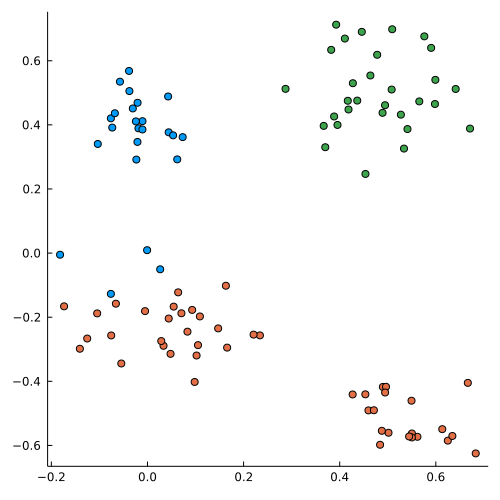

In [12]:
k = 3   # Number of groups 
N = length(X)  # Total number of points to be clustered
grps  = [[X[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
plot!(legend = false, grid = false, size = (500,500))

### Answer 4c. :
### The plot using 1-norm to show the customers' locations on the map is different from (b).
### The plot in (b) seperates the customers into "upper group", "lower left group", and "lower right group".
### However, the plot in (c) seperates the customers into "bottom group", "upper left group", and "upper right group".

### Answer 4d. :
### 3 is not a good clustering number because apparently there are "4" seperated groups on the map.
### 4 would be a good number.

In [13]:
# 5

function Gram_Schmidt(a; tol = 1e-10)
    copy_a = copy(a)
    copy_a = convert(Vector{Vector{Float64}}, copy_a)
    
    for i = 1:length(copy_a)

        for j = 1:i-1
            copy_a[i] -= (copy_a[j]'*copy_a[i]) * copy_a[j]
        end

        if norm(copy_a[i]) < tol
            println("Vectors are linearly dependent.")
            return copy_a
        end
        
        copy_a[i] = copy_a[i]/norm(copy_a[i])
    end
   
    return copy_a
end

Gram_Schmidt (generic function with 1 method)